In [2]:
from __future__ import absolute_import,print_function,division
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore')


In [3]:
from tensorflow import keras

In [4]:
data=keras.datasets.fashion_mnist

In [5]:
(x_train,y_train),(x_test,y_test)=data.load_data()

4423680/4422102 [==============================] - 4s 1us/step


In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_train=x_train/255.0
x_test=x_test/255.0

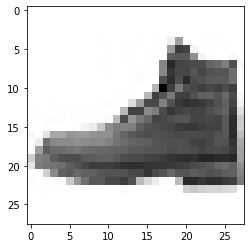

In [11]:
plt.imshow(x_train[50000],cmap=plt.cm.binary)
plt.show()

In [13]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),  #rectified linear-means for values (-inf,inf) will give (0,inf)
    keras.layers.Dense(10,activation='softmax') #softmax picks the values for output
                                                #neurons where total probability add upto 1
])

In [15]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [19]:
model.fit(x_train,y_train,epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.2775 - accuracy: 0.8979
Epoch 2/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.2686 - accuracy: 0.9008s - loss:
Epoch 3/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.2580 - accuracy: 0.9049
Epoch 4/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.2468 - accuracy: 0.9084
Epoch 5/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.2402 - accuracy: 0.9113
Epoch 6/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.2323 - accuracy: 0.9130s - loss: 0.2310 - 
Epoch 7/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.2218 - accuracy: 0.9169
Epoch 8/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.2160 - accuracy: 0.9190
Epoch 9/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.2106 - acc

In [20]:
test_loss,test_acc=model.evaluate(x_test,y_test)

10000/10000 [==============================] - 0s 31us/sample - loss: 0.3365 - accuracy: 0.8890


In [21]:
print('tested accuracy= ',test_acc)

tested accuracy=  0.889


### Prediction

In [22]:
prediction=model.predict(x_test)

In [24]:
print(prediction[0])

[2.8602723e-10 1.6634167e-09 2.1916355e-12 4.6668287e-14 6.5061728e-10
 1.5955033e-04 1.0281604e-10 2.5609471e-03 2.0629618e-09 9.9727958e-01]


In [25]:
print(np.argmax(prediction[0]))

9


In [26]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [27]:
print(class_names[np.argmax(prediction[0])])

Ankle boot


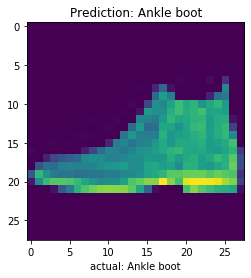

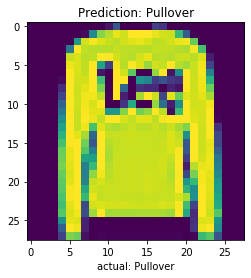

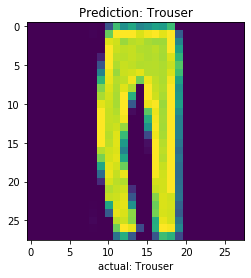

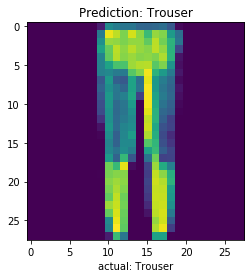

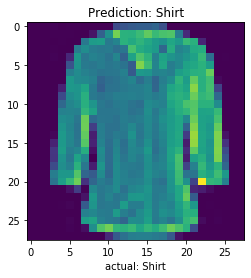

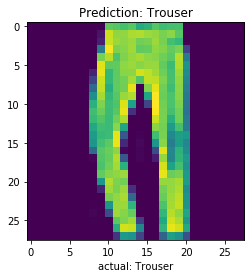

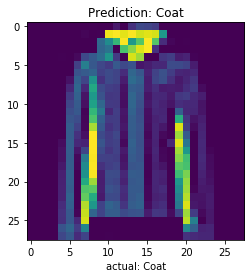

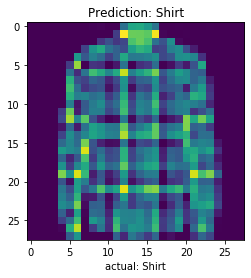

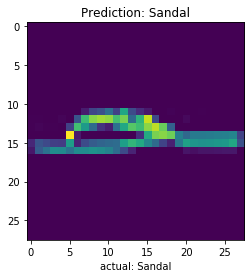

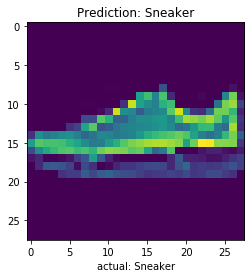

In [29]:
for i in range(10):
    plt.imshow(x_test[i])
    plt.xlabel('actual: '+ class_names[y_test[i]])
    plt.title('Prediction: '+ class_names[np.argmax(prediction[i])])
    plt.show()